In [4]:
from imageNetParser import get_features, get_classes_image_net
from index import *
import matplotlib.pyplot as plt
import model
from sklearn.decomposition import PCA
from tools import accuracy, split, foreach, random_rank, random_labels, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from itertools import product
from IStructInstantiation import *
import numpy as np
from ranking import *
import begin


In [5]:
import sys
print(sys.version)
print(np.__version__)

3.7.2 (default, Jan 10 2019, 23:51:51) 
[GCC 8.2.1 20181127]
1.16.1


In [6]:
cls = 1
dimpsi = 250
classes = get_classes_image_net()
print("classe évalué : ", classes[cls])

dataset = load()
dataset = convertClassif2Ranking(dataset, cls=cls)
x_train, y_train = dataset.x_train, dataset.y_train
x_test, y_test = dataset.x_test, dataset.y_test

name = "../res/model_{}.bin".format(classes[cls])
classifier = model.GenericTrainingAlgorithm(dimpsi, struct_classe=RankingInstantiation, classe=model.RankingStructModel)
classifier.load(name)

baseline = lambda x : np.random.randint(0, 2, x.shape[0])
acc = lambda pred, target : np.mean(pred == target)

baseline_train = acc(baseline(x_train), y_train)
baseline_test = acc(baseline(x_test), y_test)

print("baselines : (train : {}, test : {})".format(baseline_train, baseline_test))

classe évalué :  ambulance
baselines : (train : 0.05569444444444444, test : 0.06180056789711041)


In [7]:
rank = classifier.predict(x_train)
ranking = RankingOutput(rank, y_train)

In [8]:
precision, recall = recall_precision(ranking)
precision, recall = points_precision_recall(precision, recall)

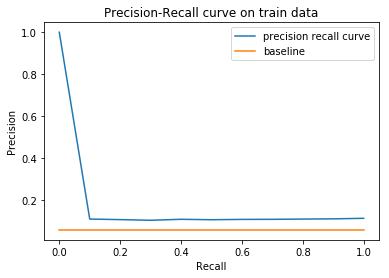

In [9]:
plot_precision_recall(precision, recall, baseline_train)

In [10]:
precision, recall = recall_precision(ranking)
average_precision(precision, recall)

0.10669545839784933

In [23]:
x_train.shape

(7200, 250)

In [24]:
y_train

array([-1, -1, -1, ..., -1, -1, -1])